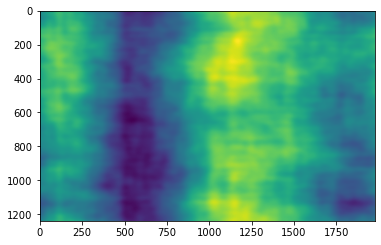

In [20]:

import cv2
from matplotlib import pyplot as plt
import numpy as np

#leo las dos imagenes
mago=cv2.imread('c_clue.jpg',cv2.IMREAD_GRAYSCALE)
escena=cv2.imread('c.jpg',cv2.IMREAD_GRAYSCALE)


# Obtengo las transformadas de fourier de las imagenes
FFT_mago=np.fft.fftn(mago)
FFT_escena=np.fft.fftn(escena)
#establezco el cero de frecuencias en el centro de la imagen
FFT_mago_shift=np.fft.fftshift(FFT_mago)
FFT_escena_shift=np.fft.fftshift(FFT_escena)


#agrego Ceros a la FFT del mago para poderla multiplicar, puesto que tienen que ser matrices cuadradas

#se hicieron varias pruebas con diferentes extractos de la imagen para verificar si funcionaba

#ceros a agregar para c_clue.jpg
FFT_mago_shift=np.pad(FFT_mago_shift,((581,581),(949,949)))

#ceros a agregar para el sello.png
#FFT_mago_shift=np.pad(FFT_mago_shift,((549,549),(942,942)))

#ceros a agregar para el texto
#FFT_mago_shift=np.pad(FFT_mago_shift,((569,568),(796,796)))

#ceros a agregar para F.png
#FFT_mago_shift=np.pad(FFT_mago_shift,((531,530),(893,893)))

#ceros a agregar para g.jpg
#FFT_mago_shift=np.pad(FFT_mago_shift,((586,586),(611,610)))

#defino las magnitudes de los espectros
Magnitude_mago=np.log(0.001+np.abs(FFT_mago_shift)**2)
Magnitude_escena=np.log(0.001+np.abs(FFT_escena_shift)**2)

#establezco el conjugado de la FFT del mago
mago_conjugado=np.conjugate(FFT_mago_shift)

#multiplico las transformadas
#Convolution=FFT_mago_shift*FFT_escena_shift
Convolution=mago_conjugado*FFT_escena_shift

#retorno el shift que introducí
convolution_ishift=np.fft.ifftshift(Convolution)

#calculo la transformada inversa
Respuesta=np.fft.ifftn(convolution_ishift)

#calculo la magnitud de la imagen para poderla graficar
#Magnitude_respuesta=np.log(0.001+np.abs(Respuesta)**2)
Magnitude_respuesta=np.abs(Respuesta)

plt.imshow(Magnitude_respuesta)

